In [159]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.linalg import inv

N = 400 # Number of samples

def generate_class_0(N):
    m = [0,0]
    C = [[2, 0],[0,1]]
    return np.random.multivariate_normal(m, C, N).T

def generate_class_1(N):
    m_A = [-2,1]
    C_A = [[9.0/8, 7.0/8],[7.0/8, 9.0/8]]
    m_B = [3,2]
    C_B = [[2, 1],[1, 2]]
    
    x1 = np.zeros((2,N))
    for i in range(0, N):
        a = random.uniform(0, 1)
        if (a < 1.0/3):
            x1[:,i] = np.random.multivariate_normal(m_A, C_A, 1)
        else:
            x1[:,i] = np.random.multivariate_normal(m_B, C_B, 1)
    return x1

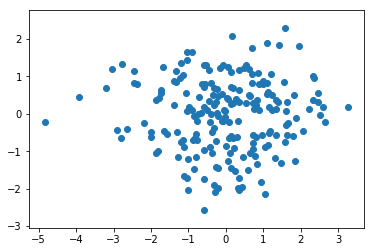

In [160]:
# Class 0, N/2 samples
x0 = generate_class_0(math.floor(N/2))
plt.scatter(x0[0],x0[1])
plt.axis('equal')
plt.show()

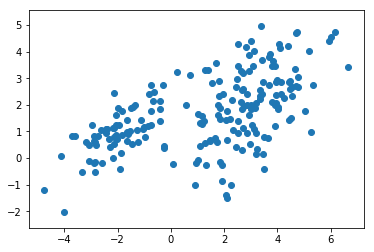

In [161]:
# Class 1, N/2 samples
x1 = generate_class_1(math.floor(N/2))
plt.scatter(x1[0], x1[1])
plt.axis('equal')
plt.show()

In [162]:
# Split the generated data into training, test and validation sets
ratio_training = 0.7
ratio_test = 0.2
ratio_validation = 0.1

x0_training = x0[:,0:math.floor(ratio_training*N/2)]
x0_test = x0[:,math.floor(ratio_training*N/2):(math.floor(ratio_training*N/2)+math.floor(ratio_test*N/2))]
x0_validation = x0[:,(math.floor(ratio_training*N/2)+math.floor(ratio_test*N/2)):]

x1_training = x1[:,0:math.floor(ratio_training*N/2)]
x1_test = x1[:,math.floor(ratio_training*N/2):(math.floor(ratio_training*N/2)+math.floor(ratio_test*N/2))]
x1_validation = x1[:,(math.floor(ratio_training*N/2)+math.floor(ratio_test*N/2)):]

# Combine the data from the two classes, and add labels
x_training = np.concatenate([x0_training, x1_training], axis=1)
x_test = np.concatenate([x0_test, x1_test], axis=1)
x_validation = np.concatenate([x0_validation, x1_validation], axis=1)

y_training = np.append(np.zeros(math.floor(ratio_training*N/2)), np.ones(math.floor(ratio_training*N/2)))
y_test = np.append(np.zeros(math.floor(ratio_test*N/2)), np.ones(math.floor(ratio_test*N/2)))
y_validation = np.append(np.zeros(math.floor(ratio_validation*N/2)), np.ones(math.floor(ratio_validation*N/2)))

# Shuffle the generated data
ind_perm_training = np.random.permutation(len(y_training))
ind_perm_test = np.random.permutation(len(y_test))
ind_perm_validation = np.random.permutation(len(y_validation))

x_training = x_training[:,ind_perm_training]
x_test = x_test[:,ind_perm_test]
x_validation = x_validation[:,ind_perm_validation]

y_training = y_training[ind_perm_training]
y_test = y_test[ind_perm_test]
y_validation = y_validation[ind_perm_validation]